# The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.
https://www.kaggle.com/datasets/msambare/fer2013?resource=download

# 2. Initial EDA

### Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from skimage import io


# import tensorflow as tf
# import keras

In [3]:
!pwd

/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/facial-expression-recognition/notebooks


In [12]:
# '/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/test'
train_path = '../../project_data/train/' # added the last forward slash
test_path = '../../project_data/test/' # added the last forward slash
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [37]:
# folders = []
train_files = [] # paths to files
train_images = [] # flattened images
train_labels = []

for dir_path, dir_name, file_names in os.walk(train_path, topdown=False):
#     folders.append(dir_path)
    label = dir_path.replace(train_path,'')
    if label != '':
        for filename in file_names:
            file_path = os.path.join(dir_path, filename)
            img = io.imread(file_path)
            img_array = np.array(img).flatten()
            
            train_files.append(file_path)
            train_images.append(img_array)
            train_labels.append(emotions[label])            

In [13]:
# folders

In [14]:
# labels[:3]

In [15]:
# files[:3]

In [16]:
# images[:1]

First label: 3


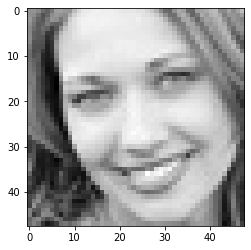

In [49]:
# Sanity Check
print(f"First label: {train_labels[1000]}")

img = io.imread(train_files[1000])
plt.imshow(img, cmap='gray')

In [32]:
# folders = []
test_files = [] # paths to files
test_images = [] # flattened images
test_labels = []

for dir_path, dir_name, file_names in os.walk(train_path, topdown=False):
#     folders.append(dir_path)
    label = dir_path.replace(train_path,'')
    if label != '':
        for filename in file_names:
            file_path = os.path.join(dir_path, filename)
            img = io.imread(file_path)
            img_array = np.array(img).flatten()
            
            test_files.append(file_path)
            test_images.append(img_array)
            test_labels.append(emotions[label]) 

In [39]:

print(train_files[0],\
train_images[0],\
train_labels[0])

../../project_data/train/happy/Training_50449107.jpg [108  83  63 ... 116 122 122] 3


In [43]:
image = mpimg.imread(train_files[1])
# imgplot = plt.imshow(image, cmap='gray')
# plt.show()

In [44]:
image.shape

(48, 48)

In [25]:
train_images[0].shape

(2304,)

In [26]:
train_images[0]

array([108,  83,  63, ..., 116, 122, 122], dtype=uint8)

In [30]:
import os
# import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
train_dir = '../../project_data/train/' # added the last forward slash
test_dir = '../../project_data/test/' # added the last forward slash
train_files = []
train_labels = []
train_images = []
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
            file = os.path.join(dirname, filename)
            image = mpimg.imread(file).flatten()
            train_files.append(file)
            train_images.append(image)
            train_labels.append(emotions[cat])

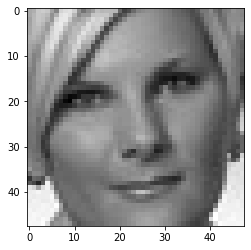

In [31]:
image = mpimg.imread(train_files[1])
imgplot = plt.imshow(image, cmap='gray')
plt.show()